# **Limpieza de Datos** 🫀

In [3]:
# Librerías
import cv2 as cv
import pandas as pd
import numpy as np
from imutils import paths
import os
import cv2 as cv
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

In [4]:
#Data
img_paths_train1= list(paths.list_images('../data/train/true'))
img_paths_train0= list(paths.list_images('../data/train/false'))
img_paths_test1= list(paths.list_images('../data/test/true'))
img_paths_test0= list(paths.list_images('../data/test/false'))

In [5]:
#Crear etiquetas
train_imgs = img_paths_train1 + img_paths_train0
train_labels = [1] * len(img_paths_train1) + [0] * len(img_paths_train0)

test_imgs = img_paths_test1 + img_paths_test0
test_labels = [1] * len(img_paths_test1) + [0] * len(img_paths_test0)


In [6]:
#Crear DataFrames
train_df = pd.DataFrame({
    'image_name': train_imgs,
    'label': train_labels
})

test_df = pd.DataFrame({
    'image_name': test_imgs,
    'label': test_labels
})

In [7]:
# Función para cargar y preprocesar imágenes
def limpiar_img(img_path):
    img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)  #pasar a escala de grises
    img = cv.resize(img, (50, 50))
    img = img.astype(np.uint8)  #tipo uint8, para almacenar los grises
    img = cv.equalizeHist(img)  #ajuste de contraste
    img = np.expand_dims(img, axis=-1)  #expandir dimensiones para que sea compatible con CNN
    img = img / 255.0  #para que los grises sean de 0 a 1, normalizacion de colores
    return img

In [12]:
#Guardar en carpeta /data/processed

pro_dir = '../data/processed'

#Estructura de directorios
for split in ['train', 'test']:
    for label in ['false', 'true']:
        os.makedirs(os.path.join(pro_dir, split, label), exist_ok=True)

#Función para guardar las imgs en carpeta 
def procesar_y_guardar_imagenes(df, split):
    for index, row in df.iterrows():
        img_path = row['image_name']
        label = 'true' if row['label'] == 1 else 'false'
        img = limpiar_img(img_path)
        #Path para guardar
        filename = os.path.basename(img_path)
        pro_img_path = os.path.join(pro_dir, split, label, filename)
        cv.imwrite(pro_img_path, (img * 255).astype(np.uint8))  ######CHEQUEA SI IGUAL SE PUEDE USAR


procesar_y_guardar_imagenes(train_df, 'train')
procesar_y_guardar_imagenes(test_df, 'test')

## EDA

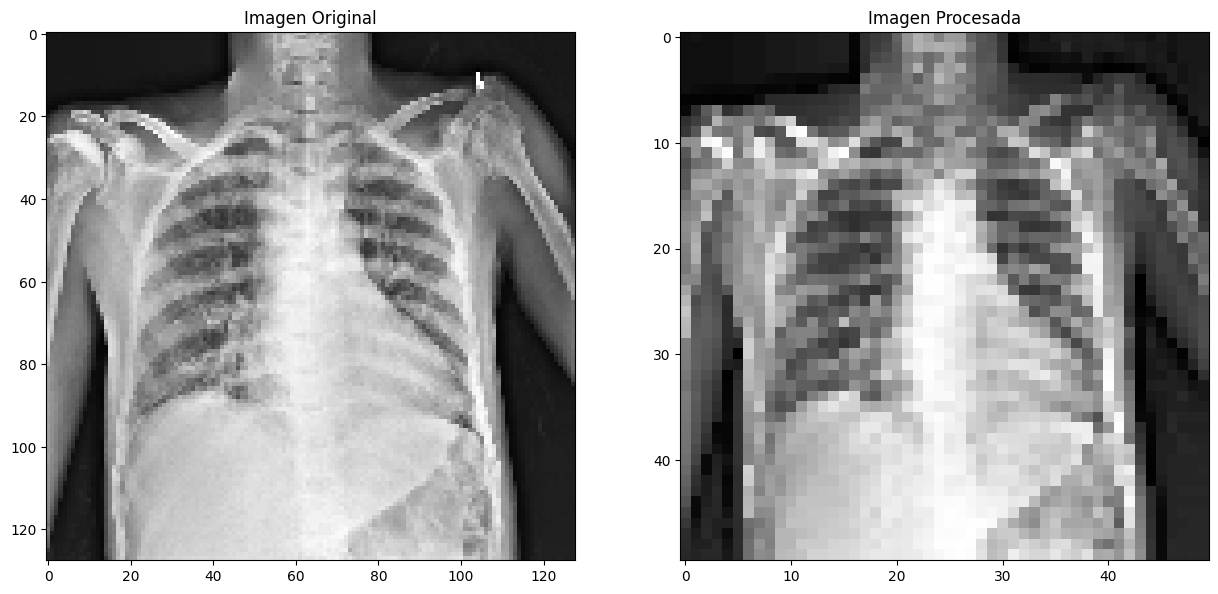

In [16]:
#Diferencia de pixeles después de limpieza

sample = imread('../data/raw/train/true/4.png')
image = imread('../data/processed/train/true/4.png')

plt.figure(figsize=(15, 15))

# Mostrar la imagen original
plt.subplot(1, 2, 1)
plt.imshow(sample, cmap='gray')
plt.title("Imagen Original")


# Mostrar la imagen procesada
plt.subplot(1, 2, 2)
plt.imshow(image, cmap='gray')
plt.title("Imagen Procesada")


plt.show;

In [17]:
#Validar que hay misma cantidad de casos positivos que negativos en el Train
print('Distribución de datos en Train🫀:\n', train_df['label'].value_counts(normalize= True), '\n')


#Validar que hay misma cantidad de casos positivos que negativos en el Test
print('Distribución de datos en Test🫀:\n',test_df['label'].value_counts(normalize =  True))

Distribución de datos en Train🫀:
 label
1    0.5
0    0.5
Name: proportion, dtype: float64 

Distribución de datos en Test🫀:
 label
1    0.5
0    0.5
Name: proportion, dtype: float64


Text(0, 0.5, 'Proporción')

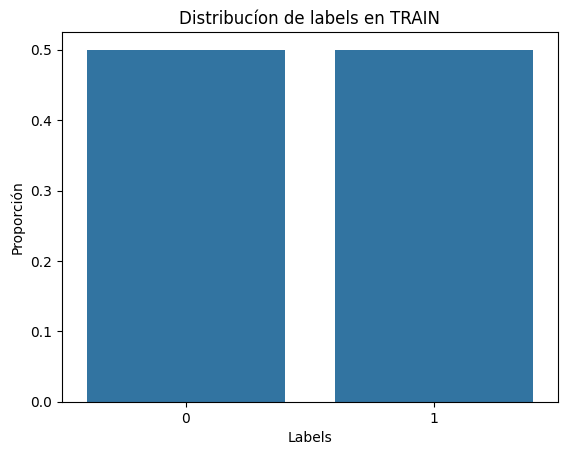

In [24]:
#Distribución en gráficas

sns.barplot(x = train_df['label'].value_counts(normalize= True).index, y = train_df['label'].value_counts(normalize= True).values)
plt.title('Distribucíon de labels en TRAIN')
plt.xlabel('Labels')
plt.ylabel('Proporción')

Text(0, 0.5, 'Proporción')

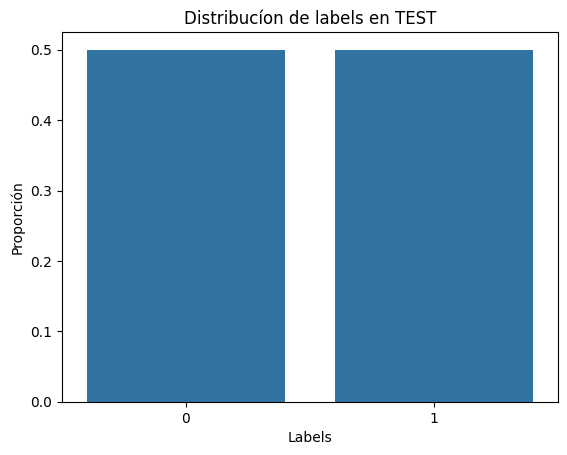

In [25]:
sns.barplot(x = test_df['label'].value_counts(normalize= True).index, y = test_df['label'].value_counts(normalize= True).values)
plt.title('Distribucíon de labels en TEST')
plt.xlabel('Labels')
plt.ylabel('Proporción')